# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np
## autoreload modules when code is run
%load_ext autoreload
%autoreload 2

import itertools as it
import scipy
from scipy import optimize 

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [118]:
### We define the variables, where we set w=1, in order to try the code.
m = 1
v = 10
epsilon = 0.3
tau_0 = 0.4
tau_1 = 0.1
kappa = 0.4
w = 1

# We define the utility function for the consumer:
def utility(c,l,v,epsilon):
    u = np.log(c) - v*(l**(1+(1/epsilon))/(1+(1/epsilon)))
    return u

# We define the constraint
def constraint(m,w,l,tau_0,tau_1,kappa):
    x = m + w*l - (tau_0*w*l + tau_1*max(w*l-kappa,0))
    return x

# We define the consumption choice as a function of the constraint
def choice(l,w,epsilon,v,tau_0,tau_1,kappa,m):
    c = constraint(m,w,l,tau_0,tau_1,kappa)
    return -utility(c,l,v,epsilon)

# We define the function in order to determine the laboursupply and consumption optimizing output
def optimizer(w,epsilon,v,tau_0,tau_1,kappa,m,do_print=False):
    result = optimize.minimize_scalar(choice, method='bounded',bounds=(0,1), args=(w,epsilon,v,tau_0,tau_1,kappa,m))
    
    l_opt = result.x
    c_opt = constraint(m,w,l_opt,tau_0,tau_1,kappa)
    u_opt = utility(c_opt,l_opt,v,epsilon)
    
    if do_print:
        print(f'l_opt = {l_opt:3f}')
        print(f'c_opt = {c_opt:3f}')
        print(f'u_opt = {u_opt:3f}')
    return l_opt,c_opt,u_opt

# Question 2

ADD ANSWER.

In [120]:
#We run the optimization with w=1 to find the average parameters.
optimizer(w,epsilon,v,tau_0,tau_1,kappa,m,do_print=True)

l_opt = 0.400001
c_opt = 1.240000
u_opt = 0.171583


(0.4000006819648219, 1.240000340982411, 0.17158308392555602)

In [119]:
l_opt=optimizer(w,epsilon,v,tau_0,tau_1,kappa,m)[0]
print(l_opt)
c_opt=optimizer(w,epsilon,v,tau_0,tau_1,kappa,m)[1]
print(c_opt)
u_opt=optimizer(w,epsilon,v,tau_0,tau_1,kappa,m)[2]
print(u_opt)

0.4000006819648219
1.240000340982411
0.17158308392555602


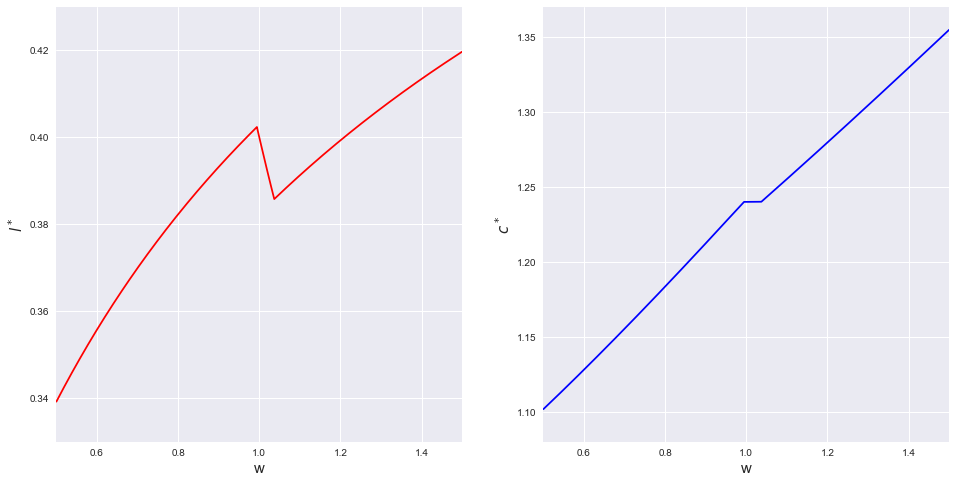

In [121]:
#We set the population to 10.000:
N=10000
#We create a vector for all values between 0.5-1.5 for the 10.0000 people:
w_vec = np.linspace(0.5, 1.5, N)
#Then we create to empty vectors for l and c in the same size:
l_vec = np.empty(N)
c_vec = np.empty(N)
#Then we run our optimizer code with the different w

for i,w in enumerate(w_vec) :
    bundle=optimizer(w,epsilon,v,tau_0,tau_1,kappa,m)
    l_vec[i]=bundle[0]
    c_vec[i]=bundle[1]

fig = plt.figure(figsize=(16,8))
ax=ax = fig.add_subplot(1,2,1)
ax.plot(w_vec, l_vec, color='red')
ax.set_xlabel('w',size=15)
ax.set_ylabel('$l^*$', size=15)
ax.set_xlim([0.5,1.5])
ax.set_ylim([0.33,0.43])
ax.grid(True)

ax=ax = fig.add_subplot(1,2,2)
ax.plot(w_vec, c_vec, color='blue')
ax.set_xlabel('w',size=15)
ax.set_ylabel('$c^*$', size=15)
ax.set_xlim([0.5,1.5])
ax.set_ylim([1.08,1.37])
ax.grid(True)

# Question 3

ADD ANSWER.

In [122]:
#Her er funktionen for tax revenu:
def Tax_revenu(epsilon,v,tau_0,tau_1,kappa,m,N):
    np.random.seed(1032)
    wi_vec1 = np.random.uniform(0.5,1.5,size=N)
    l_vec1 = np.empty(N)
    for i,w in enumerate(wi_vec1) :
        OPT=optimizer(w,epsilon,v,tau_0,tau_1,kappa,m)
        l_vec1[i]=OPT[0]

    total_tax= lambda l_vec1,wi_vec1: tau_0*wi_vec1*l_vec1+tau_1*np.max(wi_vec1*l_vec1-kappa,0)
    tax=total_tax(l_vec1,wi_vec1)
    return np.sum(tax)

In [124]:
print(f'The total tax revenu is: {Tax_revenu(epsilon,v,tau_0,tau_1,kappa,m,N):4f}')

The total tax revenu is: 1805.083775


# Question 4

ADD ANSWER.

In [125]:
epsilon1=0.1
print(f'The total tax revenu is: {Tax_revenu(epsilon1,v,tau_0,tau_1,kappa,m,N):4f}')

The total tax revenu is: 3577.386883


In [ ]:
## The tax revenu increases due to epsilon being the elasticity of labour supply. When epsilon is lowered we get more labour supply and which results in a higher tac revenu

# Question 5

ADD ANSWER.

In [129]:
N1=1000 # We set the number to 1000 in order to keep the loading time lower:
# We define the function to optimize tax_revenu
def Tax_Revenu_Optimizer(x):
    tau_0=x[0]
    tau_1=x[1]
    kappa=x[2]
    return -Tax_revenu(epsilon,v,tau_0,tau_1,kappa,m,N1)

# We set the bounds and start with the given parameter values
Bounds_Tax_Revenu=((0,1),(0,1),(0,1.5))
Guess =[0.4,0.1,0.4]

# We use the solver to maximize tax revenu given the three parameters
Result_Tax_Revenu_Optimizer = optimize.minimize(Tax_Revenu_Optimizer, Guess, method='SLSQP',bounds=Bounds_Tax_Revenu)

# We find the optimal parameters 
tau_0_opt=Result_Tax_Revenu_Optimizer.x[0]
tau_1_opt=Result_Tax_Revenu_Optimizer.x[1]
kappa_opt=Result_Tax_Revenu_Optimizer.x[2]

# We print the parameters and the tax revenu
print(f'Optimal tau_0 is {tau_0_opt:.3f}')
print(f'Optimal tau_1 is {tau_1_opt:.3f}')
print(f'Optimal kappa is {kappa_opt:.3f}')
print(f'This gives us the expected tax revenu for N1 people: {Tax_revenu(epsilon,v,tau_0_opt,tau_1_opt,kappa_opt,m,N1):.3f}, which we can multiply by 10 to get the tax revenu for a population of 10.000: {10*Tax_revenu(epsilon,v,tau_0_opt,tau_1_opt,kappa_opt,m,N1):.3f}, which is significantly higher than the tax revenu of 1805 in 3)')


Optimal tau_0 is 0.000
Optimal tau_1 is 0.792
Optimal kappa is 0.000
This gives us the expected tax revenu for N1 people: 406.649, which we can multiply by 10 to get the tax revenu for a population of 10.000: 4066.494, which is significantly higher than the tax revenu of 1805 in 3)


# Conclusion

ADD CONCISE CONLUSION.